In [321]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import cluster, decomposition, metrics

mpl.rcParams["figure.figsize"] = (14, 7)
mpl.rcParams["figure.dpi"] = 140

In [322]:
# data
df_analysis = pd.read_csv("data/to_analysis_v2.csv")

In [323]:
df_analysis.shape

(12202, 40)

In [324]:
prop_columns = [column for column in df_analysis.columns if column.startswith("prop_")]

# dropping prop columns
df_analysis_wo_prop = df_analysis.drop(prop_columns, axis=1)
df_analysis_wo_prop.isnull().sum()

contrato_id                        0
total_success_dsp5                 0
total_success_dsp10                0
total_success_dsp15                0
total_success_dsp30                0
total_success_dsp60                0
total_success_dsp90                0
total_success_dspp15               0
total_success_dspp30               0
total_success_dspp45               0
score_dsp                       1126
score_dspp                      1968
mean_dsp_contrato               1126
mean_dspp_contrato              1992
vlr_saldo_devedor_esperado         0
nr_documento                       0
tipo_empresa                       0
cidade                             0
estado                             0
subsegmento                        0
segmento                           0
('qtd_transacoes', 'mean')         6
('qtd_transacoes', 'min')          6
('qtd_transacoes', 'max')          6
('qtd_transacoes', 'median')       6
('qtd_transacoes', 'sum')          6
('vlr_tpv', 'mean')                6
(

In [325]:
# I'll do dsp and dspp seperate
dspp_columns = [column for column in df_analysis_wo_prop.columns if "dspp" in column]
df_analysis_dsp = df_analysis_wo_prop.drop(dspp_columns, axis=1)
df_analysis_dsp

,contrato_id,total_success_dsp5,total_success_dsp10,total_success_dsp15,total_success_dsp30,total_success_dsp60,total_success_dsp90,score_dsp,mean_dsp_contrato,vlr_saldo_devedor_esperado,...,"('qtd_transacoes', 'mean')","('qtd_transacoes', 'min')","('qtd_transacoes', 'max')","('qtd_transacoes', 'median')","('qtd_transacoes', 'sum')","('vlr_tpv', 'mean')","('vlr_tpv', 'min')","('vlr_tpv', 'max')","('vlr_tpv', 'median')","('vlr_tpv', 'sum')"
0,000180509391a5ac66ff83cae603ffb8,1,1,0,0,0,0,0.500000,1.500000,6924.81,...,12.357995,1.0,42.0,10.0,5178.0,443.126253,6.00,1426.50,340.00,185669.90
1,000c35a61297edadc2842f6d5b4028e1,4,1,1,1,1,1,0.291667,1.333333,33986.65,...,15.026616,1.0,66.0,11.0,3952.0,580.125856,3.50,14033.50,400.50,152573.10
2,bcd244d93204f40ca32f55fa2b06ca1f,2,2,2,2,2,1,0.000000,1.636364,4847.02,...,15.026616,1.0,66.0,11.0,3952.0,580.125856,3.50,14033.50,400.50,152573.10
3,000dcdc93a545ee45a1aee85ef85c34a,10,6,5,2,1,0,0.373333,1.416667,1861.91,...,1.500000,1.0,5.0,1.0,45.0,2538.660000,1.00,23000.00,1550.00,76159.80
4,0014cccd47b66a47af4e62c4dcbe95f1,2,1,1,0,0,0,0.333333,1.000000,16623.37,...,5.033784,1.0,13.0,5.0,2235.0,196.886892,2.00,652.90,173.90,87417.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12197,fff4bf15d5b48a5c1bda798ea77290d1,1,0,0,0,0,0,1.000000,1.000000,2271.43,...,1.556213,1.0,5.0,1.0,263.0,550.142012,5.00,10055.00,148.00,92974.00
12198,fff6edc99168d63a10ea51a7f808ff38,3,1,0,0,0,0,0.833333,1.500000,6808.42,...,1.991489,1.0,7.0,2.0,468.0,947.456596,2.00,6198.00,592.00,222652.30
12199,fffb0d6ec51d163ca8c69900f748d61b,4,3,2,0,0,0,0.527778,1.555556,136579.63,...,46.116992,2.0,199.0,43.0,16556.0,1870.555153,57.60,12323.61,1635.85,671529.30
12200,fffb47b9ce3835c85513ef5b19165f6e,1,1,1,1,0,0,0.250000,1.750000,38500.32,...,45.919118,8.0,287.0,39.0,24980.0,1765.287188,163.00,18548.58,1235.83,960316.23


In [326]:
df_analysis_dsp.isnull().sum()

contrato_id                        0
total_success_dsp5                 0
total_success_dsp10                0
total_success_dsp15                0
total_success_dsp30                0
total_success_dsp60                0
total_success_dsp90                0
score_dsp                       1126
mean_dsp_contrato               1126
vlr_saldo_devedor_esperado         0
nr_documento                       0
tipo_empresa                       0
cidade                             0
estado                             0
subsegmento                        0
segmento                           0
('qtd_transacoes', 'mean')         6
('qtd_transacoes', 'min')          6
('qtd_transacoes', 'max')          6
('qtd_transacoes', 'median')       6
('qtd_transacoes', 'sum')          6
('vlr_tpv', 'mean')                6
('vlr_tpv', 'min')                 6
('vlr_tpv', 'max')                 6
('vlr_tpv', 'median')              6
('vlr_tpv', 'sum')                 6
dtype: int64

Now we can drop the missins on score_dsp, because are the cases where we just have dspp, and not dsp.

In [327]:
print(df_analysis_dsp.shape)
df_analysis_dsp_no_missing = df_analysis_dsp.dropna(
    subset=["score_dsp", "('qtd_transacoes', 'mean')"]
)
print(df_analysis_dsp_no_missing.shape)

(12202, 26)
(11070, 26)


In [328]:
# our final dataset to use
contrato_ids = df_analysis_dsp_no_missing["contrato_id"]
df_analysis_dsp_no_missing_use = df_analysis_dsp_no_missing.drop(
    ["contrato_id"], axis=1
)
df_analysis_dsp_no_missing_use

,total_success_dsp5,total_success_dsp10,total_success_dsp15,total_success_dsp30,total_success_dsp60,total_success_dsp90,score_dsp,mean_dsp_contrato,vlr_saldo_devedor_esperado,nr_documento,...,"('qtd_transacoes', 'mean')","('qtd_transacoes', 'min')","('qtd_transacoes', 'max')","('qtd_transacoes', 'median')","('qtd_transacoes', 'sum')","('vlr_tpv', 'mean')","('vlr_tpv', 'min')","('vlr_tpv', 'max')","('vlr_tpv', 'median')","('vlr_tpv', 'sum')"
0,1,1,0,0,0,0,0.500000,1.500000,6924.81,7996daab1bbe000bb5d1cc1bf317f390,...,12.357995,1.0,42.0,10.0,5178.0,443.126253,6.0,1426.50,340.00,185669.90
1,4,1,1,1,1,1,0.291667,1.333333,33986.65,1191ebfa94d3ca2e8a02f696aafde4a4,...,15.026616,1.0,66.0,11.0,3952.0,580.125856,3.5,14033.50,400.50,152573.10
2,2,2,2,2,2,1,0.000000,1.636364,4847.02,1191ebfa94d3ca2e8a02f696aafde4a4,...,15.026616,1.0,66.0,11.0,3952.0,580.125856,3.5,14033.50,400.50,152573.10
3,10,6,5,2,1,0,0.373333,1.416667,1861.91,cd1178c3ed53ebe730ba521617cb574b,...,1.500000,1.0,5.0,1.0,45.0,2538.660000,1.0,23000.00,1550.00,76159.80
4,2,1,1,0,0,0,0.333333,1.000000,16623.37,40cd8202c632fef1e0d5f43f341990a7,...,5.033784,1.0,13.0,5.0,2235.0,196.886892,2.0,652.90,173.90,87417.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12196,5,1,0,1,0,0,0.600000,1.571429,148812.31,4cd9e072190dff6cd7c5a9e90f11b318,...,44.009242,1.0,140.0,40.0,23809.0,1065.138392,6.5,3773.57,942.49,576239.87
12197,1,0,0,0,0,0,1.000000,1.000000,2271.43,fa7900d2354552bfcd058da26b847ae7,...,1.556213,1.0,5.0,1.0,263.0,550.142012,5.0,10055.00,148.00,92974.00
12198,3,1,0,0,0,0,0.833333,1.500000,6808.42,0eefed947e158b4295d05fdf3954a87f,...,1.991489,1.0,7.0,2.0,468.0,947.456596,2.0,6198.00,592.00,222652.30
12199,4,3,2,0,0,0,0.527778,1.555556,136579.63,67eb23dfd23b5a7a470c35d0db12a282,...,46.116992,2.0,199.0,43.0,16556.0,1870.555153,57.6,12323.61,1635.85,671529.30


# DSP analysis 3

In [329]:
df_analysis_dsp_no_missing_use.columns

Index(['total_success_dsp5', 'total_success_dsp10', 'total_success_dsp15',
       'total_success_dsp30', 'total_success_dsp60', 'total_success_dsp90',
       'score_dsp', 'mean_dsp_contrato', 'vlr_saldo_devedor_esperado',
       'nr_documento', 'tipo_empresa', 'cidade', 'estado', 'subsegmento',
       'segmento', '('qtd_transacoes', 'mean')', '('qtd_transacoes', 'min')',
       '('qtd_transacoes', 'max')', '('qtd_transacoes', 'median')',
       '('qtd_transacoes', 'sum')', '('vlr_tpv', 'mean')',
       '('vlr_tpv', 'min')', '('vlr_tpv', 'max')', '('vlr_tpv', 'median')',
       '('vlr_tpv', 'sum')'],
      dtype='object')

In [330]:
df_analysis_dsp_no_missing_use = df_analysis_dsp_no_missing_use.iloc[:, 0:15]
# df_analysis_dsp_no_missing_use.drop(["tipo_empresa", "cidade", "estado"], axis=1, inplace=True)

In [331]:
df_estados_regioes = pd.read_csv("data/estados_regioes.csv")
df_estados_regioes

,codigo_uf,uf,nome,latitude,longitude,regiao
0,11,RO,Rondônia,-10.83,-63.34,Norte
1,12,AC,Acre,-8.77,-70.55,Norte
2,13,AM,Amazonas,-3.47,-65.10,Norte
3,14,RR,Roraima,1.99,-61.33,Norte
4,15,PA,Pará,-3.79,-52.48,Norte
5,16,AP,Amapá,1.41,-51.77,Norte
6,17,TO,Tocantins,-9.46,-48.26,Norte
7,21,MA,Maranhão,-5.42,-45.44,Nordeste
8,22,PI,Piauí,-6.60,-42.28,Nordeste
9,23,CE,Ceará,-5.20,-39.53,Nordeste


In [333]:
import ast


def get_region(x):
    if isinstance(x, str):
        try:
            region = df_estados_regioes[df_estados_regioes["uf"] == x]["regiao"].values
            return region[0]
        except:
            return x
    return x


df_analysis_dsp_no_missing_use["region"] = df_analysis_dsp_no_missing_use[
    "estado"
].apply(get_region)
df_analysis_dsp_no_missing_use

,total_success_dsp5,total_success_dsp10,total_success_dsp15,total_success_dsp30,total_success_dsp60,total_success_dsp90,score_dsp,mean_dsp_contrato,vlr_saldo_devedor_esperado,nr_documento,tipo_empresa,cidade,estado,subsegmento,segmento,region
0,1,1,0,0,0,0,0.500000,1.500000,6924.81,7996daab1bbe000bb5d1cc1bf317f390,MEI,Cuiabá,MT,Alimentação Rápida,Alimentação,Centro-Oeste
1,4,1,1,1,1,1,0.291667,1.333333,33986.65,1191ebfa94d3ca2e8a02f696aafde4a4,PF,São Paulo,SP,Lojas Diversas,Varejo,Sudeste
2,2,2,2,2,2,1,0.000000,1.636364,4847.02,1191ebfa94d3ca2e8a02f696aafde4a4,PF,São Paulo,SP,Lojas Diversas,Varejo,Sudeste
3,10,6,5,2,1,0,0.373333,1.416667,1861.91,cd1178c3ed53ebe730ba521617cb574b,PF,Camaçari,BA,Material de Construção,Bens duráveis,Nordeste
4,2,1,1,0,0,0,0.333333,1.000000,16623.37,40cd8202c632fef1e0d5f43f341990a7,PF,Serra,ES,Lojas Diversas,Varejo,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12196,5,1,0,1,0,0,0.600000,1.571429,148812.31,4cd9e072190dff6cd7c5a9e90f11b318,PJ,Maranguape,CE,Alimentação Rápida,Alimentação,Nordeste
12197,1,0,0,0,0,0,1.000000,1.000000,2271.43,fa7900d2354552bfcd058da26b847ae7,MEI,Santo Antônio de Jesus,BA,Lojas Diversas,Bens duráveis,Nordeste
12198,3,1,0,0,0,0,0.833333,1.500000,6808.42,0eefed947e158b4295d05fdf3954a87f,MEI,Alvorada,RS,Automotivo,Serviços,Sul
12199,4,3,2,0,0,0,0.527778,1.555556,136579.63,67eb23dfd23b5a7a470c35d0db12a282,PJ,São Paulo,SP,Alimentação Rápida,Alimentação,Sudeste


In [334]:
df_analysis_dsp_no_missing_use.drop(
    ["tipo_empresa", "cidade", "estado"], axis=1, inplace=True
)

In [335]:
# df_analysis_dsp_no_missing_use.value_counts(["cidade"])

In [336]:
# remove some inconsistences
# df_analysis_dsp_no_missing_use.value_counts(["estado"])  # 54

In [337]:
# keep just strings, clean lists
df_analysis_dsp_no_missing_use.value_counts(["segmento"])  # 41

segmento                                                
Alimentação                                                 3786
Varejo                                                      2167
Serviços                                                    1897
Bens duráveis                                               1748
Supermercado/Farmácia                                        772
Serviços recorrentes                                         266
Viagens e entretenimento                                     159
Posto                                                        117
Outros                                                        44
['Varejo', 'Varejo']                                          18
['Bens duráveis', 'Bens duráveis']                            14
['Serviços', 'Serviços']                                      12
['Alimentação', 'Alimentação']                                11
['Varejo', 'Alimentação']                                      7
['Varejo', 'Serviços']           

In [338]:
# remove lists too
df_analysis_dsp_no_missing_use.value_counts(["subsegmento"])  # 68

subsegmento                           
Alimentação Rápida                        2143
Lojas Diversas                            2063
Outros                                    1346
Bares e Restaurantes                       974
Automotivo                                 909
                                          ... 
['Lojas Diversas', 'Lazer & Turismo']        1
['Automotivo', 'Lojas Diversas']             1
['Lazer & Turismo', 'Lazer & Turismo']       1
['Educação', 'Outros']                       1
['Bares e Restaurantes', 'None']             1
Length: 67, dtype: int64

In [339]:
# remove lists
# df_analysis_dsp_no_missing_use.value_counts(["tipo_empresa"])

## New data here

In [340]:
categorical_variables = df_analysis_dsp_no_missing_use.select_dtypes(
    include=object
).columns
new_categorical_variables = [feature + "_new" for feature in categorical_variables]
df_analysis_dsp_no_missing_use_copy = df_analysis_dsp_no_missing_use.copy()

for i, feature in enumerate(categorical_variables):
    print(feature)
    df_analysis_dsp_no_missing_use_copy[
        new_categorical_variables[i]
    ] = df_analysis_dsp_no_missing_use[feature].apply(
        lambda x: None if len(x.split(",")) > 1 else x
    )

# df_analysis_dsp_no_missing_use.value_counts(["subsegmento_clean"])

nr_documento
subsegmento
segmento
region


In [341]:
df_analysis_dsp_no_missing_use_copy.drop(categorical_variables, axis=1, inplace=True)

In [343]:
df_analysis_dsp_no_missing_use_copy.columns

Index(['total_success_dsp5', 'total_success_dsp10', 'total_success_dsp15',
       'total_success_dsp30', 'total_success_dsp60', 'total_success_dsp90',
       'score_dsp', 'mean_dsp_contrato', 'vlr_saldo_devedor_esperado',
       'nr_documento_new', 'subsegmento_new', 'segmento_new', 'region_new'],
      dtype='object')

In [344]:
df_analysis_dsp_no_missing_use_copy.drop(["nr_documento_new"], axis=1, inplace=True)

In [345]:
numerical_variables = df_analysis_dsp_no_missing_use_copy.select_dtypes(exclude=object)
cat_variables = df_analysis_dsp_no_missing_use_copy.select_dtypes(include=object)

In [346]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

preprocessor = StandardScaler()
df_analysis_transformed = preprocessor.fit_transform(numerical_variables)
numerical_transformed = pd.DataFrame(
    df_analysis_transformed, columns=preprocessor.get_feature_names_out()
)
numerical_transformed

,total_success_dsp5,total_success_dsp10,total_success_dsp15,total_success_dsp30,total_success_dsp60,total_success_dsp90,score_dsp,mean_dsp_contrato,vlr_saldo_devedor_esperado
0,-0.795709,-0.451049,-0.772946,-0.705853,-0.608562,-0.541900,-0.249392,0.174147,-0.619924
1,-0.287135,-0.451049,-0.213038,0.250548,0.995052,1.385746,-0.877951,-0.424492,0.045576
2,-0.626185,-0.052015,0.346870,1.206949,2.598667,1.385746,-1.757933,0.663943,-0.671021
3,0.730013,1.544121,2.026593,1.206949,0.995052,-0.541900,-0.631556,-0.125172,-0.744430
4,-0.626185,-0.451049,-0.213038,-0.705853,-0.608562,-0.541900,-0.752239,-1.621770,-0.381419
...,...,...,...,...,...,...,...,...,...
11065,-0.117611,-0.451049,-0.772946,0.250548,-0.608562,-0.541900,0.052316,0.430707,2.869348
11066,-0.795709,-0.850083,-0.772946,-0.705853,-0.608562,-0.541900,1.259149,-1.621770,-0.734360
11067,-0.456660,-0.451049,-0.772946,-0.705853,-0.608562,-0.541900,0.756302,0.174147,-0.622787
11068,-0.287135,0.347019,0.346870,-0.705853,-0.608562,-0.541900,-0.165584,0.373693,2.568524


In [347]:
# one hot on categorical vars
from sklearn.preprocessing import OneHotEncoder

# lets drop nr_documento, not relevent right now
# categorical_variables.drop(["nr_documento"], axis=1, inplace=True)

ohe = OneHotEncoder(sparse=False)
df_analysis_cat_trans = ohe.fit_transform(cat_variables)
categorical_transformed = pd.DataFrame(
    df_analysis_cat_trans, columns=ohe.get_feature_names_out()
)
categorical_transformed

,subsegmento_new_Academias,subsegmento_new_Alimentação Rápida,subsegmento_new_Atacadista de Alimento,subsegmento_new_Atacadistas Gerais,subsegmento_new_Automotivo,subsegmento_new_Bares e Restaurantes,subsegmento_new_Educação,subsegmento_new_Lazer & Turismo,subsegmento_new_Lojas Diversas,subsegmento_new_Material de Construção,...,segmento_new_Varejo,segmento_new_Viagens e entretenimento,segmento_new_None,region_new_Centro-Oeste,region_new_ND,region_new_Nordeste,region_new_Norte,region_new_Sudeste,region_new_Sul,region_new_None
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11065,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11067,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11068,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [348]:
# join all the data
df_modeling = pd.concat([categorical_transformed, numerical_transformed], axis=1)
df_modeling.shape

(11070, 43)

In [349]:
df_modeling

,subsegmento_new_Academias,subsegmento_new_Alimentação Rápida,subsegmento_new_Atacadista de Alimento,subsegmento_new_Atacadistas Gerais,subsegmento_new_Automotivo,subsegmento_new_Bares e Restaurantes,subsegmento_new_Educação,subsegmento_new_Lazer & Turismo,subsegmento_new_Lojas Diversas,subsegmento_new_Material de Construção,...,region_new_None,total_success_dsp5,total_success_dsp10,total_success_dsp15,total_success_dsp30,total_success_dsp60,total_success_dsp90,score_dsp,mean_dsp_contrato,vlr_saldo_devedor_esperado
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.795709,-0.451049,-0.772946,-0.705853,-0.608562,-0.541900,-0.249392,0.174147,-0.619924
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,-0.287135,-0.451049,-0.213038,0.250548,0.995052,1.385746,-0.877951,-0.424492,0.045576
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,-0.626185,-0.052015,0.346870,1.206949,2.598667,1.385746,-1.757933,0.663943,-0.671021
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.730013,1.544121,2.026593,1.206949,0.995052,-0.541900,-0.631556,-0.125172,-0.744430
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,-0.626185,-0.451049,-0.213038,-0.705853,-0.608562,-0.541900,-0.752239,-1.621770,-0.381419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11065,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.117611,-0.451049,-0.772946,0.250548,-0.608562,-0.541900,0.052316,0.430707,2.869348
11066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,-0.795709,-0.850083,-0.772946,-0.705853,-0.608562,-0.541900,1.259149,-1.621770,-0.734360
11067,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.456660,-0.451049,-0.772946,-0.705853,-0.608562,-0.541900,0.756302,0.174147,-0.622787
11068,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.287135,0.347019,0.346870,-0.705853,-0.608562,-0.541900,-0.165584,0.373693,2.568524


In [350]:
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

score_lst = []
for n_cluster in clusters:
    cluster_kmeans = cluster.KMeans(n_clusters=n_cluster).fit(df_modeling)
    preds = cluster_kmeans.predict(df_modeling)
    centers = cluster_kmeans.cluster_centers_
    score = metrics.silhouette_score(df_modeling, preds, metric="euclidean")
    score_lst.append(metrics.silhouette_score(df_modeling, preds, metric="euclidean"))
    print("For n cluster: {}. The avg silhouette_score is {}".format(n_cluster, score))

For n cluster: 2. The avg silhouette_score is 0.21763618905148374
For n cluster: 3. The avg silhouette_score is 0.21018253697795505
For n cluster: 4. The avg silhouette_score is 0.14309824127570803
For n cluster: 5. The avg silhouette_score is 0.1521252639466962
For n cluster: 6. The avg silhouette_score is 0.1368626523037985
For n cluster: 7. The avg silhouette_score is 0.14751206190446148
For n cluster: 8. The avg silhouette_score is 0.14846261134587188
For n cluster: 9. The avg silhouette_score is 0.1443607093042863
For n cluster: 10. The avg silhouette_score is 0.12332652564731637


In [351]:
# seems that 4 clusters are better
clusters = cluster.KMeans(n_clusters=4).fit(df_modeling)
preds = clusters.predict(df_modeling)
preds

array([3, 0, 0, ..., 3, 3, 2], dtype=int32)

In [352]:
df_modeling["clusters"] = preds
df_modeling.drop(["clusters"], axis=1, inplace=True)

In [353]:
# creating PCA analysis too
pca = decomposition.PCA(n_components=2)
orders_to_cluster_components = pca.fit_transform(df_modeling)
orders_to_cluster_components_df = pd.DataFrame(
    orders_to_cluster_components, columns=["pc1", "pc2"]
)
orders_to_cluster_components_df

,pc1,pc2
0,-1.421946,-0.413854
1,0.871049,-1.684519
2,2.522495,-2.398510
3,2.699546,1.255170
4,-0.938789,-0.348151
...,...,...
11065,-0.861955,-0.519002
11066,-2.035960,0.193881
11067,-1.617193,0.356667
11068,-0.441272,-0.052235


In [354]:
orders_to_cluster_components_df["clusters"] = preds
orders_to_cluster_components_df

,pc1,pc2,clusters
0,-1.421946,-0.413854,3
1,0.871049,-1.684519,0
2,2.522495,-2.398510,0
3,2.699546,1.255170,1
4,-0.938789,-0.348151,3
...,...,...,...
11065,-0.861955,-0.519002,3
11066,-2.035960,0.193881,3
11067,-1.617193,0.356667,3
11068,-0.441272,-0.052235,3


In [355]:
# copied from kaggle
def pca_results(good_data, pca):
    """
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    """

    # Dimension indexing
    dimensions = ["Dimension {}".format(i) for i in range(1, len(pca.components_) + 1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns=good_data.keys())
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns=["Explained Variance"])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize=(14, 8))

    # Plot the feature weights as a function of the components
    components.plot(ax=ax, kind="bar")
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(
            i - 0.40,
            ax.get_ylim()[1] + 0.05,
            "Explained Variance\n          %.4f" % (ev),
        )

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis=1)

,Explained Variance,subsegmento_new_Academias,subsegmento_new_Alimentação Rápida,subsegmento_new_Atacadista de Alimento,subsegmento_new_Atacadistas Gerais,subsegmento_new_Automotivo,subsegmento_new_Bares e Restaurantes,subsegmento_new_Educação,subsegmento_new_Lazer & Turismo,subsegmento_new_Lojas Diversas,...,region_new_None,total_success_dsp5,total_success_dsp10,total_success_dsp15,total_success_dsp30,total_success_dsp60,total_success_dsp90,score_dsp,mean_dsp_contrato,vlr_saldo_devedor_esperado
Dimension 1,0.3045,-0.0005,-0.0138,-0.0005,0.0029,0.0030,-0.0019,0.0020,0.0009,0.0005,...,0.0005,0.2564,0.4179,0.4497,0.4515,0.3785,0.3272,-0.3196,0.0072,0.0110
Dimension 2,0.1468,0.0017,-0.0294,-0.0005,0.0053,0.0244,-0.0138,0.0067,0.0007,-0.0084,...,-0.0004,0.5255,0.3908,0.2518,-0.0208,-0.3515,-0.4177,0.4154,-0.0022,-0.1659


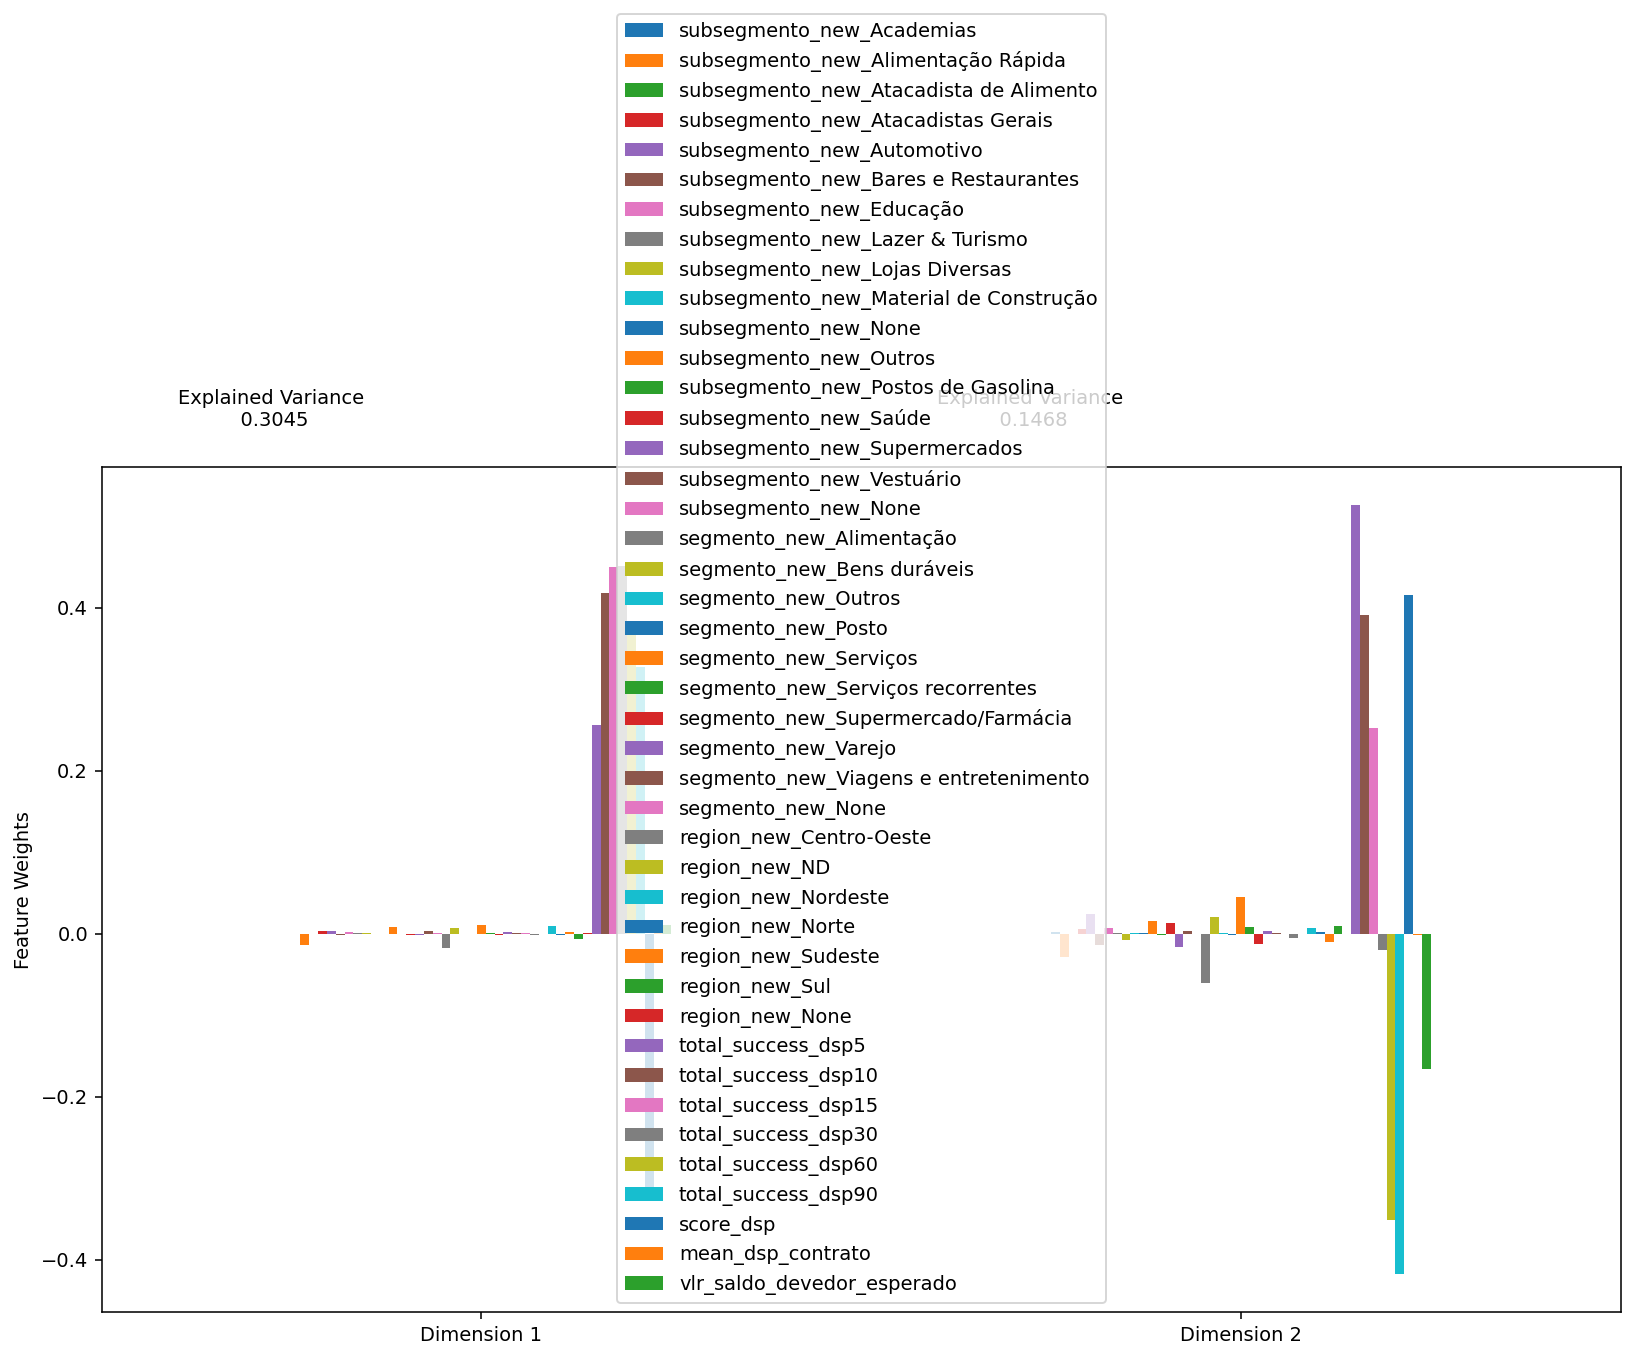

In [356]:
pca_results(df_modeling, pca)

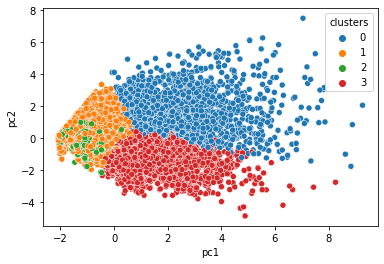

In [268]:
_ = sns.scatterplot(
    x="pc1",
    y="pc2",
    data=orders_to_cluster_components_df,
    hue="clusters",
    palette=sns.color_palette("tab10", 4),
)
plt.show()